In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import pandas as pd
import healpy as hp
import seaborn as sns
import sys, pickle, gzip
from astropy.io import fits


import curvspec.master as cs
# import hpyroutines.utils as hpy
import hpyroutines.apo as hpa
from astropy.table import Table

from cosmojo.universe import Cosmo


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
def GetClTauTau(A_tau=1, L_C=130,lmax=500):
    L = np.arange(lmax+1,dtype=np.float32)
    return (A_tau/1e4) * 4.*np.pi /L_C**2 * np.exp(-(L/L_C)**2)

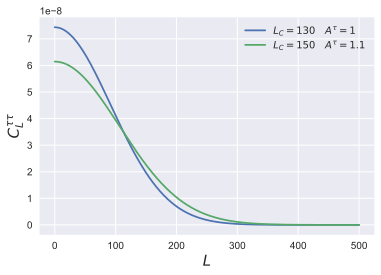

In [46]:
plt.plot(GetClTauTau(),label=r'$L_C=130\quad A^{\tau}=1$')
plt.plot(GetClTauTau(L_C=150,A_tau=1.1),label=r'$L_C=150\quad A^{\tau}=1.1$')
plt.xlabel(r'$L$',size=15)
plt.ylabel(r'$C_{L}^{\tau\tau}$',size=15)
plt.legend()

In [23]:
tau_map = hp.synfast(GetClTauTau(lmax=5000), 2048, pixwin=0)

/Users/fbianchini/anaconda/lib/python2.7/site-packages/healpy/sphtfunc.py:296: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning)


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


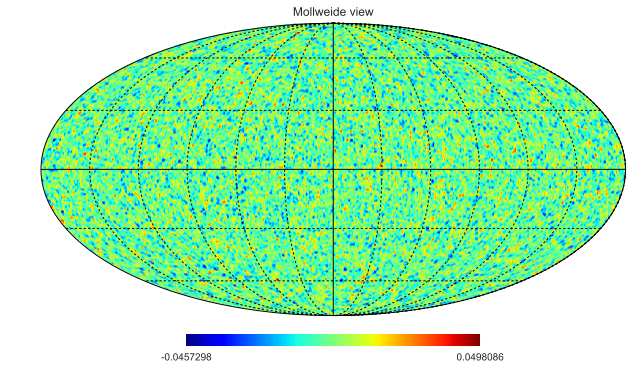

In [24]:
hp.mollview(tau_map)
hp.graticule()

In [25]:
hp.write_map('patchy_tau_nopixwin_nside2048.fits', tau_map)

        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead. [astropy.utils.decorators]


In [26]:
tt = hp.read_map('tt_only_nopixwin_nside2048.fits')

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


86.4865542549 93.5134457451 -3.51344574512 3.51344574512
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.
86.4865542549 93.5134457451 -3.51344574512 3.51344574512
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.
86.4865542549 93.5134457451 -3.51344574512 3.51344574512
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.
86.4865542549 93.5134457451 -3.51344574512 3.51344574512
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.
86.4865542549 93.5134457451 -3.51344574512 3.51344574512
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.
86.4865542549 93.5134457451 -3.51344574512 3.51344574512
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.
86.4865542549 93.5134457451 -3.51344574512 3.51344574512
The interval between parallels is 1 d

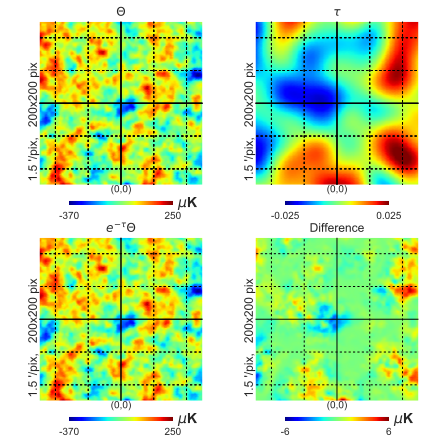

In [65]:
cmap = 'jet'
plt.figure(figsize=(6,6))
hp.gnomview(tt, sub=(2,2,1), title=r'$\Theta$', min=-370, max=250, cmap=cmap, unit=r'$\mu$K')
hp.graticule()
hp.gnomview(tau_map, sub=(2,2,2), title=r'$\tau$', min=-0.025, max=0.025, cmap=cmap)
hp.graticule()
hp.gnomview(np.exp(-tau_map)*tt, sub=(2,2,3), title=r'$e^{-\tau}\Theta$', min=-370, max=250, cmap=cmap, unit=r'$\mu$K')
hp.graticule()
hp.gnomview(np.exp(-tau_map)*tt - tt, sub=(2,2,4), title='Difference', min=-6,max=6, cmap=cmap, unit=r'$\mu$K')
hp.graticule()
plt.savefig('plots/patchy_tau_maps.pdf')

In [58]:
hp.gnomview?

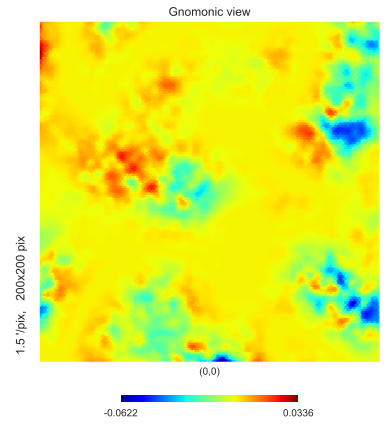

In [53]:
hp.gnomview(np.exp(-tau_map)*tt - (tt-tau_map*tt))

In [69]:
(5.6-7.8)/5.6

-0.3928571428571429

In [70]:
3484-2971

513

In [71]:
513+124

637